# Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [5]:
df = pd.read_csv(r"C:\Users\abhij\Desktop\tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Exploratory Data Analysis(EDA)

In [10]:
#Basic Statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Preprocessing

In [12]:
#Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling Missing Values

In [40]:
#Fill age with median
df['Age']=df['Age'].fillna(df['Age'].median())

In [42]:
#Fill Embarked with the most common values
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [58]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [60]:
#Convert categorical Data
df=pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [64]:
#Drop Irrelevant Columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Data Visualization

Text(0.5, 1.0, 'Survival Count')

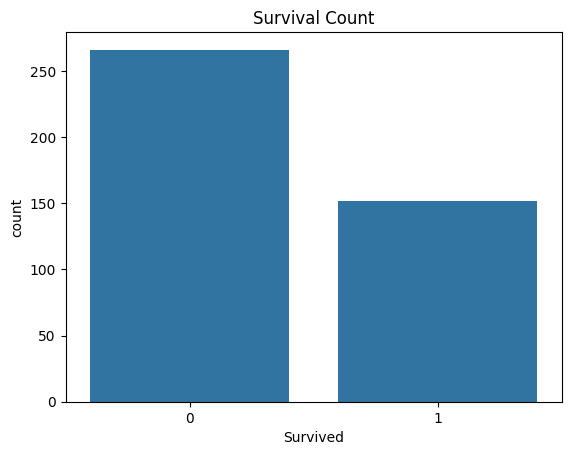

In [69]:
#Survived Distribution
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')

<Axes: xlabel='Survived', ylabel='count'>

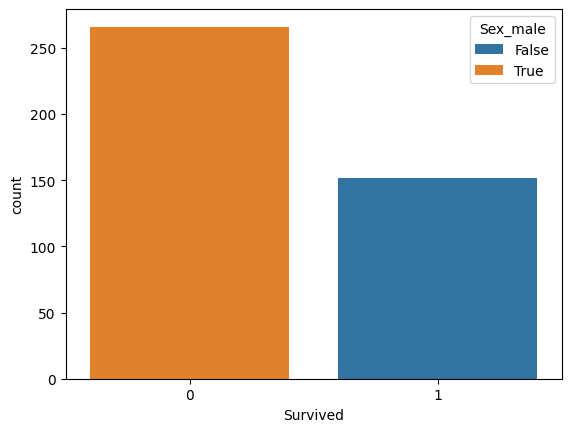

In [85]:
#Survived by Gender
sns.countplot(data=df, x='Survived', hue='Sex_male')

In [83]:
print(df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


<Axes: xlabel='Survived', ylabel='count'>

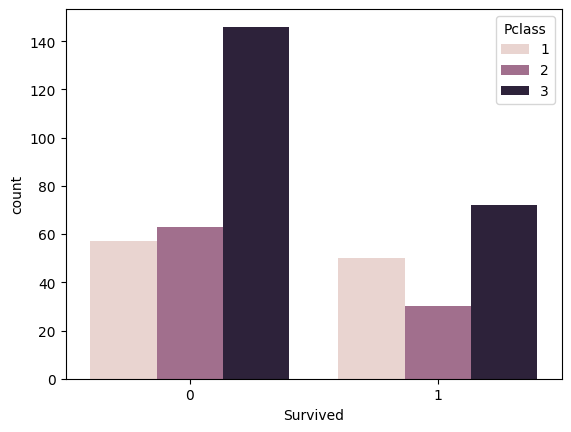

In [91]:
#Survival by Class
sns.countplot(data=df, x='Survived', hue='Pclass')

<Axes: xlabel='Age', ylabel='Count'>

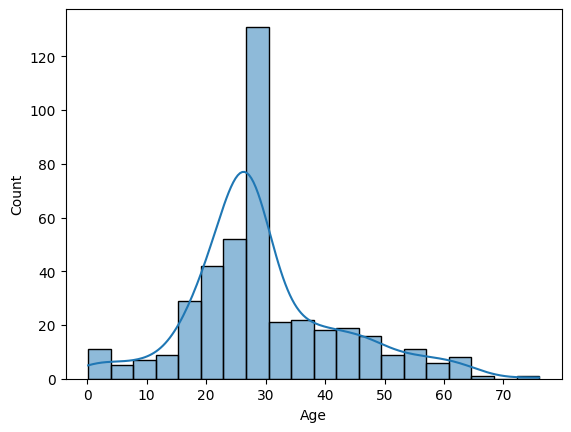

In [89]:
#Age distribution
sns.histplot(data=df, x='Age', bins=20, kde=True)

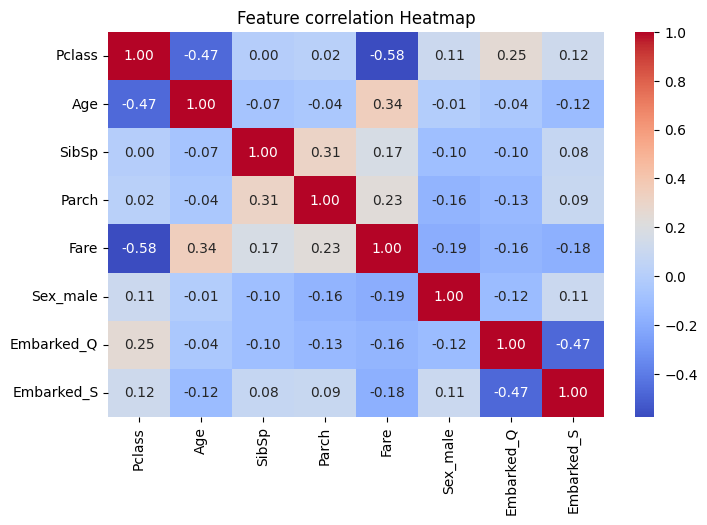

In [179]:
#Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature correlation Heatmap')
plt.show()

In [205]:
print(df.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'AgeGroup'],
      dtype='object')


# Feature Selection and Split Data

In [94]:
#Select Features
x=df.drop('Survived', axis=1)
y=df['Survived']

In [98]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building

In [101]:
#Random Forext Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
#Make Predictions:
y_pred = model.predict(X_test)

# Model Evaluation

In [114]:
#Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

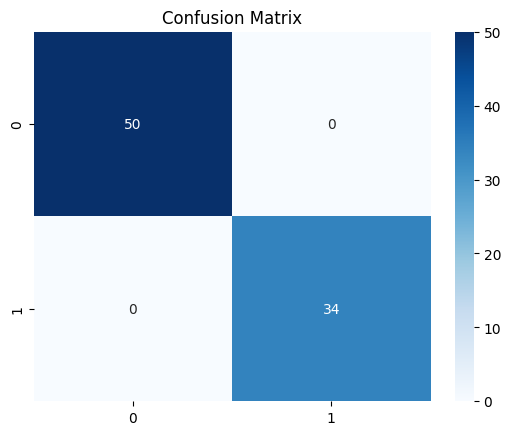

In [227]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

In [132]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Predict on Test Data

In [143]:
#Drop 'Survived' from the training featres
x = df.drop('Survived', axis=1)
y=df['Survived']


df=df.drop('Survived', axis=1, errors = 'ignore')

In [145]:
#Align train and test data columns to ensure they match
x, df = x.align(df, axis=1, join='inner')

In [149]:
#Refit the Model and Predict
model.fit(X_train, y_train)
predictions = model.predict(df)

In [151]:
#Additional Debugging
print("Train columns:", x.columns)
print("Test columns:", df.columns)

Train columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
Test columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [153]:
#Make prediction
test_predictions = model.predict(df)

In [167]:
print(df.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [175]:
#Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

